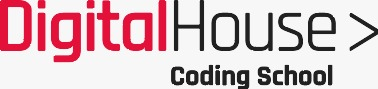

##  Final Challenge,  Data Science Course, 2020 - 2021

### 1- Data preparation

#### Data was downloaded from https://portal.gdc.cancer.gov/ ("Genomic Data Commons Data Portal" - National Cancer Institute)  updated on 03-31-2021 as .tar.gz files that had the information of 1881 miRNA expression

In [1]:
import numpy as np
import pandas as pd

In [142]:
# files absolut paths were determined in order to import them
from pathlib import Path
import glob

#list of txt files paths 
txt_list = [ archivo.with_suffix(".txt").as_posix() \
            for archivo in Path("C:/Users/maria/Desktop/CPTAC-3/miRNA").glob("*/*")]



In [3]:
#All files are read and listed

list_data=[]
for filename in txt_list:
    data= pd.read_csv(filename, sep ='\t')
    list_data.append(data)    

In [4]:
# expression column of each file is extracted 

list_data_miRNA = []
for data in list_data:
    data_miRNA = data.iloc[:,2]
    list_data_miRNA.append(data_miRNA)

In [5]:
# all columns were concatenated in one dataframe

data_miRNA_1 = pd.concat(list_data_miRNA, axis =1)

In [6]:
# Data frame index was assigned

data_miRNA_1.index= data.miRNA_ID

In [7]:
#Dataframe shape
data_miRNA_1.shape

(1881, 1358)

In [8]:
# The dataframe was transposed to have all data fro the same sample in each row and each miRNA expression in columns  

#Data was converted to float

data_miRNA_2 = data_miRNA_1.T
data_miRNA_2 = data_miRNA_2.apply(pd.to_numeric, downcast='float', errors='coerce')
data_miRNA_2=data_miRNA_2.astype(float)
data_miRNA_2.shape

(1358, 1881)

In [9]:
# Zeros were replaced with np.NaN to apply log(base =2)
data_miRNA_2 = data_miRNA_2.replace(0, np.NaN)


In [10]:
# Each value was replaced by its log
data_miRNA_2_b = np.log2(data_miRNA_2)

In [11]:
data_miRNA_2_b.head()

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
reads_per_million_miRNA_mapped,15.236065,15.186093,15.188128,13.714389,14.074671,11.884881,11.226529,14.497747,14.592864,14.248748,...,NaN,4.257547,-2.840484,-0.518556,8.752906,NaN,1.966870,11.581120,14.111949,11.893907
reads_per_million_miRNA_mapped,14.882326,14.809423,14.821605,13.610795,11.643271,12.393752,11.098648,14.555188,14.658526,14.477021,...,NaN,3.694379,-2.591023,-1.591023,8.228358,NaN,5.583903,10.392683,11.855156,12.444936
reads_per_million_miRNA_mapped,14.382911,14.351445,14.357197,13.171616,13.566840,10.736305,10.926948,13.755154,13.840824,13.970266,...,NaN,2.691144,-3.141742,-1.556784,7.780839,NaN,7.699032,11.088575,13.857902,12.008081
reads_per_million_miRNA_mapped,13.768529,13.698553,13.715105,11.769493,10.766500,12.179938,10.345813,14.455957,14.589400,15.326121,...,NaN,4.902513,NaN,0.685283,5.346348,NaN,8.267236,12.781438,10.912778,11.535000
reads_per_million_miRNA_mapped,14.756170,14.715036,14.715615,13.243572,11.120588,11.935819,10.090452,14.470656,14.542343,14.934333,...,NaN,4.485545,NaN,0.611076,8.779999,NaN,6.245282,10.274397,11.881488,11.635385


In [12]:
#  -inf  were replaced by zeros 
from numpy import inf
data_miRNA_2_b[data_miRNA_2_b == -inf] = 0
data_miRNA_2_b = data_miRNA_2_b.apply(lambda x : x.replace(np.NaN,0))
data_miRNA_2_b.head()

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
reads_per_million_miRNA_mapped,15.236065,15.186093,15.188128,13.714389,14.074671,11.884881,11.226529,14.497747,14.592864,14.248748,...,0.0,4.257547,-2.840484,-0.518556,8.752906,0.0,1.966870,11.581120,14.111949,11.893907
reads_per_million_miRNA_mapped,14.882326,14.809423,14.821605,13.610795,11.643271,12.393752,11.098648,14.555188,14.658526,14.477021,...,0.0,3.694379,-2.591023,-1.591023,8.228358,0.0,5.583903,10.392683,11.855156,12.444936
reads_per_million_miRNA_mapped,14.382911,14.351445,14.357197,13.171616,13.566840,10.736305,10.926948,13.755154,13.840824,13.970266,...,0.0,2.691144,-3.141742,-1.556784,7.780839,0.0,7.699032,11.088575,13.857902,12.008081
reads_per_million_miRNA_mapped,13.768529,13.698553,13.715105,11.769493,10.766500,12.179938,10.345813,14.455957,14.589400,15.326121,...,0.0,4.902513,0.000000,0.685283,5.346348,0.0,8.267236,12.781438,10.912778,11.535000
reads_per_million_miRNA_mapped,14.756170,14.715036,14.715615,13.243572,11.120588,11.935819,10.090452,14.470656,14.542343,14.934333,...,0.0,4.485545,0.000000,0.611076,8.779999,0.0,6.245282,10.274397,11.881488,11.635385


In [13]:
# .txt files paths list to identify the origen of data from data frame  data_miRNA_2_b

for archivo in glob.glob("C:/Users/maria/Desktop/CPTAC-3/miRNA/**", recursive=True):
    print(archivo)

C:/Users/maria/Desktop/CPTAC-3/miRNA\
C:/Users/maria/Desktop/CPTAC-3/miRNA\0073a8d6-bce8-4ce2-836f-2c9a81a0ebf1
C:/Users/maria/Desktop/CPTAC-3/miRNA\0073a8d6-bce8-4ce2-836f-2c9a81a0ebf1\09370adc-0882-4327-8da9-56e6038e3970.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\007c44f5-9a64-4b8d-b4b6-dfd3b0cdd189
C:/Users/maria/Desktop/CPTAC-3/miRNA\007c44f5-9a64-4b8d-b4b6-dfd3b0cdd189\61195270-972e-47e3-9ddc-026b684f9474.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\00d04b74-2463-430a-95e4-0b40d7e90ca9
C:/Users/maria/Desktop/CPTAC-3/miRNA\00d04b74-2463-430a-95e4-0b40d7e90ca9\df7f805c-f577-4811-b3cf-6663bd1171d7.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\00d4c617-8b6b-468c-88b0-b50148c2e023
C:/Users/maria/Desktop/CPTAC-3/miRNA\00d4c617-8b6b-468c-88b0-b50148c2e023\4560f036-2c02-49b9-a30a-e1a2a1f23aba.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\00e35ffc-4ed6-4aba-8abf-ea32d7665a2c
C:/Users

C:/Users/maria/Desktop/CPTAC-3/miRNA\a165412e-1953-42e9-be2b-0d954800eddd\870a137d-7070-4408-be37-b2fcc76bb089.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\a165412e-1953-42e9-be2b-0d954800eddd\annotations.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\a171f061-0659-49bb-875c-914c7631d93d
C:/Users/maria/Desktop/CPTAC-3/miRNA\a171f061-0659-49bb-875c-914c7631d93d\c83eae7a-607d-45bb-a823-c4bb818da780.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\a197fffb-257f-431a-be1e-3e273293763d
C:/Users/maria/Desktop/CPTAC-3/miRNA\a197fffb-257f-431a-be1e-3e273293763d\cfbacb00-dd05-446f-a98b-239e760ba667.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\a1cf7da4-de7f-4e5e-9934-9126ad5fac74
C:/Users/maria/Desktop/CPTAC-3/miRNA\a1cf7da4-de7f-4e5e-9934-9126ad5fac74\7e28853c-599a-4e60-aacb-a98bd27e003f.mirnaseq.mirnas.quantification.txt
C:/Users/maria/Desktop/CPTAC-3/miRNA\a1e9880f-e072-4022-b810-cee96b92de95
C:/Users/maria/Desktop/CPTAC-3

In [14]:
glob_ = list(txt_list)
glob_

['C:/Users/maria/Desktop/CPTAC-3/miRNA/0073a8d6-bce8-4ce2-836f-2c9a81a0ebf1/09370adc-0882-4327-8da9-56e6038e3970.mirnaseq.mirnas.quantification.txt',
 'C:/Users/maria/Desktop/CPTAC-3/miRNA/007c44f5-9a64-4b8d-b4b6-dfd3b0cdd189/61195270-972e-47e3-9ddc-026b684f9474.mirnaseq.mirnas.quantification.txt',
 'C:/Users/maria/Desktop/CPTAC-3/miRNA/00d04b74-2463-430a-95e4-0b40d7e90ca9/df7f805c-f577-4811-b3cf-6663bd1171d7.mirnaseq.mirnas.quantification.txt',
 'C:/Users/maria/Desktop/CPTAC-3/miRNA/00d4c617-8b6b-468c-88b0-b50148c2e023/4560f036-2c02-49b9-a30a-e1a2a1f23aba.mirnaseq.mirnas.quantification.txt',
 'C:/Users/maria/Desktop/CPTAC-3/miRNA/00e35ffc-4ed6-4aba-8abf-ea32d7665a2c/8e38bc9e-9730-4ff6-b2a2-ef4c731406e1.mirnaseq.mirnas.quantification.txt',
 'C:/Users/maria/Desktop/CPTAC-3/miRNA/00e61335-6695-4bb8-8c48-8aa4447839d0/5b49ed02-352c-4970-8e48-8c20fe7b74a6.mirnaseq.mirnas.quantification.txt',
 'C:/Users/maria/Desktop/CPTAC-3/miRNA/0106982c-3ff6-4abb-ab8c-4b4dfca26e06/6d6087b5-616d-4db7-80f5-

In [15]:
#data frame generated with the previous list
glob_df = pd.DataFrame(glob_)

In [16]:
# string split  
glob_df_split = glob_df[0].apply(lambda x: x.split('/'))
glob_df_split[0]

['C:',
 'Users',
 'maria',
 'Desktop',
 'CPTAC-3',
 'miRNA',
 '0073a8d6-bce8-4ce2-836f-2c9a81a0ebf1',
 '09370adc-0882-4327-8da9-56e6038e3970.mirnaseq.mirnas.quantification.txt']

In [17]:
#list of each last part of the split,  extracted in order to get file name 
tag_ultima_palabra = [x.split('/')[7] for x in glob_df[0]]

In [18]:
tag_ultima_palabra

['09370adc-0882-4327-8da9-56e6038e3970.mirnaseq.mirnas.quantification.txt',
 '61195270-972e-47e3-9ddc-026b684f9474.mirnaseq.mirnas.quantification.txt',
 'df7f805c-f577-4811-b3cf-6663bd1171d7.mirnaseq.mirnas.quantification.txt',
 '4560f036-2c02-49b9-a30a-e1a2a1f23aba.mirnaseq.mirnas.quantification.txt',
 '8e38bc9e-9730-4ff6-b2a2-ef4c731406e1.mirnaseq.mirnas.quantification.txt',
 '5b49ed02-352c-4970-8e48-8c20fe7b74a6.mirnaseq.mirnas.quantification.txt',
 '6d6087b5-616d-4db7-80f5-8f6968a66b04.mirnaseq.mirnas.quantification.txt',
 '475a4f6f-707b-4819-b187-4f35082a1bae.mirnaseq.mirnas.quantification.txt',
 '3379ba59-2f24-4fc6-90ca-d6aa6346491e.mirnaseq.mirnas.quantification.txt',
 'adecb0d7-ebb0-40e5-98dd-c6520fd7cb65.mirnaseq.mirnas.quantification.txt',
 'annotations.txt',
 'dd70a2b9-5f61-492a-a5b2-15051417e279.mirnaseq.mirnas.quantification.txt',
 '61dee219-431d-4104-ae12-119c2c20b64d.mirnaseq.mirnas.quantification.txt',
 '65e10fb9-88d3-4972-bbb2-f939720012c5.mirnaseq.mirnas.quantificatio

In [19]:
#data frame column was replaced by the txt files names
#glob_df[0]=tag_ultima_palabra

In [20]:
# glob_df.head()

In [21]:
# the former list was assigned as a column of data_miRNA_2_b
data_miRNA_2_b['File Name'] = tag_ultima_palabra
data_miRNA_2_b = data_miRNA_2_b.reset_index(drop=True)

In [22]:
# duplicated were eliminated
data_miRNA_2_b = data_miRNA_2_b.drop_duplicates(subset = 'File Name', keep= 'first')

In [23]:
# final result was a dataframe composed of 1258 rows (one fro each sample) with 1882 columns (each with the expression quantification 
#of a single miRNA
data_miRNA_2_b.shape

(1258, 1882)

In [24]:
data_miRNA_2_b.head()

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,File Name
0,15.236065,15.186093,15.188128,13.714389,14.074671,11.884881,11.226529,14.497747,14.592864,14.248748,...,4.257547,-2.840484,-0.518556,8.752906,0.0,1.966870,11.581120,14.111949,11.893907,09370adc-0882-4327-8da9-56e6038e3970.mirnaseq....
1,14.882326,14.809423,14.821605,13.610795,11.643271,12.393752,11.098648,14.555188,14.658526,14.477021,...,3.694379,-2.591023,-1.591023,8.228358,0.0,5.583903,10.392683,11.855156,12.444936,61195270-972e-47e3-9ddc-026b684f9474.mirnaseq....
2,14.382911,14.351445,14.357197,13.171616,13.566840,10.736305,10.926948,13.755154,13.840824,13.970266,...,2.691144,-3.141742,-1.556784,7.780839,0.0,7.699032,11.088575,13.857902,12.008081,df7f805c-f577-4811-b3cf-6663bd1171d7.mirnaseq....
3,13.768529,13.698553,13.715105,11.769493,10.766500,12.179938,10.345813,14.455957,14.589400,15.326121,...,4.902513,0.000000,0.685283,5.346348,0.0,8.267236,12.781438,10.912778,11.535000,4560f036-2c02-49b9-a30a-e1a2a1f23aba.mirnaseq....
4,14.756170,14.715036,14.715615,13.243572,11.120588,11.935819,10.090452,14.470656,14.542343,14.934333,...,4.485545,0.000000,0.611076,8.779999,0.0,6.245282,10.274397,11.881488,11.635385,8e38bc9e-9730-4ff6-b2a2-ef4c731406e1.mirnaseq....


In [25]:
# data cointaining the relation between sample file and patient case id was read
data_samples = pd.read_csv('C:/Users/maria/Desktop/CPTAC-3/File_names.csv', sep=';')
data_samples.head()

,File Name,Case ID,Sample Type
0,9b5c9a98-bf21-401b-928c-6a00e191069e.mirnaseq....,C3N-00180,Solid Tissue Normal
1,f86240f2-85da-4350-935d-343b54c15381.mirnaseq....,C3N-00852,Primary Tumor
2,700d3735-2a9e-4d47-9011-4912b36ae726.mirnaseq....,C3N-00149,Solid Tissue Normal
3,1569ab76-8969-48ee-9730-120d2781d4ea.mirnaseq....,C3N-02769,Primary Tumor
4,1895b816-2357-45c7-aefc-e15962d9d24f.mirnaseq....,C3L-00977,Primary Tumor


In [26]:
# 'Case ID' and 'Sample Type' columns were split into sub-strings
data_samples['Case ID'] = data_samples['Case ID'].apply(lambda x: x.split(',')[0])
data_samples['Sample Type'] = data_samples['Sample Type'].apply(lambda x: x.split(',')[0])

In [27]:
#There were tumoral and normal samples among data
data_samples['Sample Type'].value_counts()

Primary Tumor          863
Solid Tissue Normal    394
Name: Sample Type, dtype: int64

In [28]:
#only tumoral samples were chosen
data_samples_2 =  data_samples.loc[data_samples['Sample Type'] == 'Primary Tumor', ['File Name', 'Case ID']]
data_samples_2.shape

(863, 2)

In [29]:
# A new dataframe was created from merge between data_miRNA_2_b.merge and data_samples_2

data_miRNA_3 = data_miRNA_2_b.merge(data_samples_2, how = 'inner', on= 'File Name')

In [30]:
# Shape of the new data frame
data_miRNA_3.shape

(863, 1883)

In [31]:
# Data with patients clinical features was read

data_clinica = pd.read_csv('C:/Users/maria/Desktop/CPTAC-3/Clinica2.csv', sep = ';')

In [32]:
data_clinica.head()

,Case ID,ethnicity,gender,age_at_diagnosis,ajcc_pathologic_stage,primary_diagnosis,tumor_grade,tumor_stage
0,C3L-02115,not reported,male,29237.0,Stage IIB,"Infiltrating duct carcinoma, NOS",G2,Stage IIB
1,C3L-00928,not hispanic or latino,female,21418.0,Stage IIB,"Infiltrating duct carcinoma, NOS",G1,Stage IIB
2,C3N-01175,not reported,female,22205.0,Stage III,"Renal cell carcinoma, NOS",G2,Stage III
3,C3N-04276,not reported,male,24876.0,Not Reported,"Squamous cell carcinoma, NOS",G2,pT4apN0
4,C3L-01256,not reported,female,27474.0,Not Reported,"Endometrioid adenocarcinoma, NOS",G1,Stage I


In [33]:
# 'case_id' column was renamed
data_clinica = data_clinica.rename(columns = {'case_id' : 'Case ID'})

In [34]:
# duplicates were drop from clinical data frame
data_clinica = data_clinica.drop_duplicates(subset ='Case ID', keep='first')
data_clinica.shape

(777, 8)

In [35]:
data_miRNA_3.shape

(863, 1883)

In [36]:
# A new data frame with miRNA expression and clinical feature was made from a merge between data_miRNA_3.merge and data_clinica
data_miRNA_4 = data_miRNA_3.merge(data_clinica, how = 'left', on= 'Case ID')

In [37]:
#Shape of data frame
data_miRNA_4.shape

(863, 1890)

In [38]:
# data type of each column 

data_miRNA_4.dtypes

hsa-let-7a-1             float64
hsa-let-7a-2             float64
hsa-let-7a-3             float64
hsa-let-7b               float64
hsa-let-7c               float64
                          ...   
age_at_diagnosis         float64
ajcc_pathologic_stage     object
primary_diagnosis         object
tumor_grade               object
tumor_stage               object
Length: 1890, dtype: object

In [39]:
# This data frame had the information about 863 patients and 1890 features
data_miRNA_4.shape

(863, 1890)

### 2- Exploring & Understanding data shape

In [40]:
# data_miRNA_4 categorical columns list
categorical_columns= [col for col in data_miRNA_4.columns if data_miRNA_4[col].dtypes == 'object']
categorical_columns

['File Name',
 'Case ID',
 'ethnicity',
 'gender',
 'ajcc_pathologic_stage',
 'primary_diagnosis',
 'tumor_grade',
 'tumor_stage']

In [41]:
# 'primary_diagnosis' features distribution

data_miRNA_4.primary_diagnosis.value_counts()

Squamous cell carcinoma, NOS        217
Renal cell carcinoma, NOS           197
Infiltrating duct carcinoma, NOS    140
Adenocarcinoma, NOS                 111
Endometrioid adenocarcinoma, NOS    100
Glioblastoma                         98
Name: primary_diagnosis, dtype: int64

In [42]:
# 'tumor_grade' feature distribution. Tumor grade is the description of a tumor based on how abnormal the tumor cells and the
# tumor tissue look under a microscope. It is an indicator of how quickly a tumor is likely to grow and spread.

data_miRNA_4.tumor_grade.value_counts()

G2              428
G3              235
Not Reported     98
G1               76
G4               14
GX                9
Unknown           3
Name: tumor_grade, dtype: int64

In [43]:
#'tumor_stage' feature distribution. Staging is the process of finding out how much cancer is in a person’s body 
# and where it’s located.

data_miRNA_4.tumor_stage.value_counts()

Stage I                         165
Stage III                       129
Not Reported                    103
Stage IIB                        87
Stage IB                         62
Stage IIA                        48
Stage II                         45
Stage IV                         42
Stage IIIA                       37
Stage IA                         36
Stage IVA                        23
III                              10
IB                                5
pT2pN2b                           5
pT2N2                             5
IIA                               3
no resection                      3
IA                                3
pT2pN0                            3
IVa                               3
pT4apN0                           3
pT3                               3
pT2N1                             2
pT2pNx                            2
I b                               2
II                                2
IV                                2
Stage IIIB                  

In [44]:
# 'ethnicity' feature distribution. There was a high number of 'Not reported' values
data_miRNA_4.ethnicity.value_counts()

not reported              600
not hispanic or latino    241
hispanic or latino         22
Name: ethnicity, dtype: int64

In [45]:
# 'Gender' feature distribution
data_miRNA_4.gender.value_counts()

male      529
female    334
Name: gender, dtype: int64

In [46]:
#'File Name', 'Case ID' columns were drop since they were not important for modeling 

data_miRNA_5 = data_miRNA_4.drop(columns =  ['File Name', 'Case ID']) 

In [47]:
# Numeric columns
columnas_numericas = data_miRNA_5.dtypes.loc[data_miRNA_5.dtypes == 'float']
columnas_numericas

hsa-let-7a-1        float64
hsa-let-7a-2        float64
hsa-let-7a-3        float64
hsa-let-7b          float64
hsa-let-7c          float64
                     ...   
hsa-mir-96          float64
hsa-mir-98          float64
hsa-mir-99a         float64
hsa-mir-99b         float64
age_at_diagnosis    float64
Length: 1882, dtype: object

In [48]:
# miRNA expression features had mean = 0 which meant that no sample expressed those miRNA

estadistica=data_miRNA_5.iloc[:, 0:1881].describe()
estadistica.reset_index()
columnas_media_cero = estadistica.loc[:, estadistica.iloc[2,:] ==0].columns

In [49]:
estadistica


,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,...,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,14.383574,14.335470,14.339580,12.954019,11.315309,11.789605,10.769150,14.221137,14.318544,14.380476,...,-0.013760,4.089779,-0.819872,1.351965,8.131327,-0.004362,6.016607,10.871112,11.642922,11.690872
std,0.507372,0.505114,0.504180,0.720949,1.332115,0.561443,0.792833,0.337176,0.340354,0.468495,...,0.212660,0.957223,1.243184,3.524565,1.126795,0.128128,1.635635,0.557721,1.308473,0.748304
min,12.852774,12.791184,12.825875,10.917210,6.699609,9.944556,7.264274,12.735097,12.856574,12.981018,...,-4.025453,1.057234,-4.132920,-4.244029,5.104085,-3.763994,0.320968,9.283640,4.221561,8.637580
25%,14.049753,14.003408,14.006577,12.488001,10.460964,11.438397,10.294655,14.005631,14.097075,14.089838,...,0.000000,3.435919,-1.742053,-1.086384,7.351694,0.000000,5.119649,10.481393,10.825722,11.189159
50%,14.362578,14.313049,14.316659,12.914994,11.322556,11.751097,10.817301,14.228597,14.328963,14.355252,...,0.000000,3.962462,0.000000,0.000000,8.172360,0.000000,6.212974,10.799959,11.646281,11.702781
75%,14.683670,14.636795,14.642575,13.343581,12.166434,12.079387,11.205579,14.454533,14.546984,14.584419,...,0.000000,4.689783,0.000000,3.702206,8.866718,0.000000,7.122635,11.184384,12.511042,12.181552
max,16.319666,16.254263,16.262363,16.385453,14.823193,14.119062,13.808404,15.448210,15.547704,16.193304,...,0.000000,7.730456,0.803338,9.648082,11.747144,0.000000,11.016087,12.911053,15.248102,14.361467


In [50]:
#There were 206  miRNA that had no expression in any sample
columnas_media_cero

Index(['hsa-mir-103b-1', 'hsa-mir-103b-2', 'hsa-mir-1202', 'hsa-mir-1203',
       'hsa-mir-1208', 'hsa-mir-1244-3', 'hsa-mir-1244-4', 'hsa-mir-1255b-1',
       'hsa-mir-1268a', 'hsa-mir-1273d',
       ...
       'hsa-mir-8083', 'hsa-mir-8084', 'hsa-mir-8086', 'hsa-mir-8087',
       'hsa-mir-8088', 'hsa-mir-8485', 'hsa-mir-920', 'hsa-mir-924',
       'hsa-mir-941-2', 'hsa-mir-941-3'],
      dtype='object', length=205)

In [51]:
# Those miRNA were dropped

data_miRNA_5 = data_miRNA_5.drop(columns = columnas_media_cero)

In [52]:
# New shape od data frame
data_miRNA_5.shape

(863, 1683)

In [53]:
# Nulls quantification
data_miRNA_5.isnull().sum()

hsa-let-7a-1             0
hsa-let-7a-2             0
hsa-let-7a-3             0
hsa-let-7b               0
hsa-let-7c               0
                        ..
age_at_diagnosis         5
ajcc_pathologic_stage    0
primary_diagnosis        0
tumor_grade              0
tumor_stage              0
Length: 1683, dtype: int64

In [54]:
#nulls elimination
data_miRNA_5.dropna(subset = ['age_at_diagnosis'], how = 'all', axis = 0, inplace = True)

In [55]:
data_miRNA_5.isnull().sum()

hsa-let-7a-1             0
hsa-let-7a-2             0
hsa-let-7a-3             0
hsa-let-7b               0
hsa-let-7c               0
                        ..
age_at_diagnosis         0
ajcc_pathologic_stage    0
primary_diagnosis        0
tumor_grade              0
tumor_stage              0
Length: 1683, dtype: int64

In [56]:
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


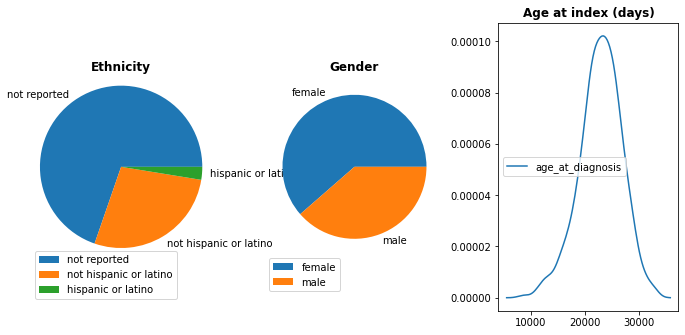

In [57]:
# Visualization of demographic features
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,4))

ax1.pie(data_miRNA_5.ethnicity.value_counts(), labels = data_miRNA_5.ethnicity.unique());
ax1.legend(data_miRNA_5.ethnicity.unique(),loc='center left', bbox_to_anchor=(0, -0.6, 0.5, 1))
ax1.set_title('Ethnicity', fontweight ="bold")
ax1.autoscale()
ax2.pie(data_miRNA_5.gender.value_counts(), labels = data_miRNA_5.gender.unique());
ax2.legend(data_miRNA_5.gender.unique(),loc='center left', bbox_to_anchor=(0, -0.6, 0.5, 1))
ax2.set_title('Gender', fontweight ="bold")
ax3.autoscale()
sns.kdeplot(data_miRNA_5.age_at_diagnosis, ax = ax3)
ax3.set_title('Age at index (days)', fontweight ="bold")
ax3.autoscale()
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=1.2, 
                    wspace=0.3, 
                    hspace=0.3)


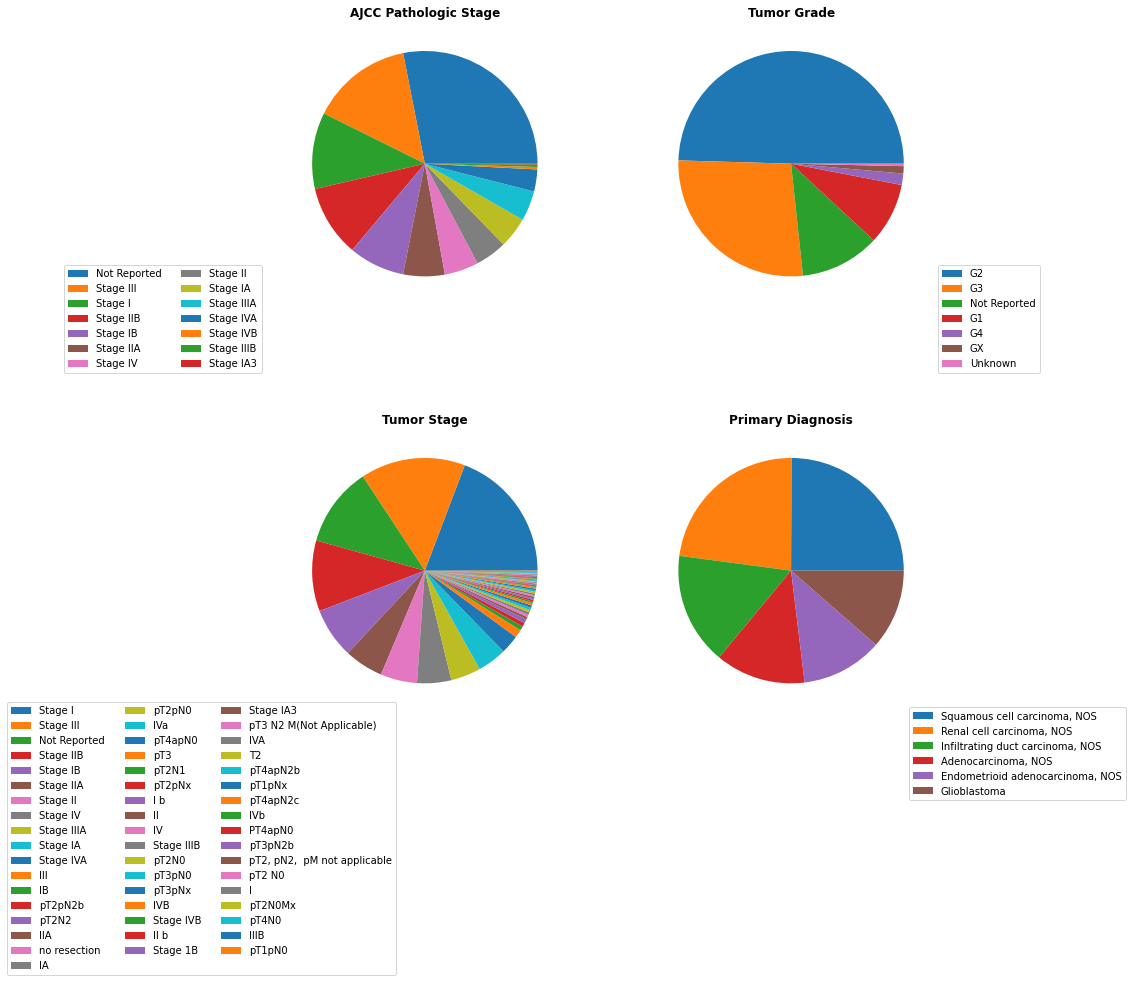

In [58]:
# Visualization of tumoral features
f, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].pie(data_miRNA_5.ajcc_pathologic_stage.value_counts());
ax[0,0].legend(data_miRNA_5.ajcc_pathologic_stage.value_counts().index,loc='center left', bbox_to_anchor=(-0.8, -0.55, 0.5, 1), ncol =2)
ax[0,0].set_title('AJCC Pathologic Stage', fontweight ="bold")

ax[0,1].pie(data_miRNA_5.tumor_grade.value_counts());
ax[0,1].legend(data_miRNA_5.tumor_grade.value_counts().index,loc='center right', bbox_to_anchor=(0.9, -0.55, 0.5, 1))
ax[0,1].set_title('Tumor Grade', fontweight ="bold")


ax[1,0].pie(data_miRNA_5.tumor_stage.value_counts());
ax[1,0].legend(data_miRNA_5.tumor_stage.value_counts().index,loc='center left', bbox_to_anchor=(-1, -0.95, 0.5, 1), ncol = 3)
ax[1,0].set_title('Tumor Stage', fontweight ="bold")
   
ax[1,1].pie(data_miRNA_5.primary_diagnosis.value_counts());
ax[1,1].legend(data_miRNA_5.primary_diagnosis.value_counts().index,loc='center left', bbox_to_anchor=(.9, -0.65, 0.5, 1))
ax[1,1].set_title('Primary Diagnosis', fontweight ="bold")


plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=1.2, 
                    wspace=0.3, 
                    hspace=0.3)

#### * The T refers to the size and extent of the main tumor. The main tumor is usually called the primary tumor.
#### * The N refers to the the number of nearby lymph nodes that have cancer.
#### * The M refers to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body

### PRIMARY TUMOR (T)
#### TX: Main tumor cannot be measured.
#### T0: Main tumor cannot be found.
#### T1, T2, T3, T4: Refers to the size and/or extent of the main tumor. The higher the number after the T, the larger the tumor or the more it has grown into nearby tissues. 
#### T's may be further divided to provide more detail, such as T3a and T3b.


### DISTANT METASTASES (M)
#### If there are no symptoms or signs of distant metastasis, M is categorized as clinically M0
#### If there is clinical evidence of distant metastases on physical examination, imaging studies, or invasive procedure M1
#### Uncertain MX
#### Patients with circulating tumor cells (CTCs) in  blood, or disseminated tumor cells (DTCs) in organs and micro-metastasis in bone marrow detected by IHC or molecular techniques are categorized as cM0(i+)

### REGIONAL LYMPH NODES (N)
#### NX: Cancer in nearby lymph nodes cannot be measured.
#### N0: There is no cancer in nearby lymph nodes.
#### N1, N2, N3: Refers to the number and location of lymph nodes that contain cancer. 
#### The higher the number after the N, the more lymph nodes that contain cancer.

### 3- Feature Engineering

In [59]:
#There were a big proportion of 'Not reported' cases in ajcc_pathologic_stage
data_miRNA_5.ajcc_pathologic_stage.value_counts().round(2)

Not Reported    241
Stage III       125
Stage I          94
Stage IIB        88
Stage IB         69
Stage IIA        51
Stage IV         42
Stage II         39
Stage IA         38
Stage IIIA       37
Stage IVA        27
Stage IVB         3
Stage IIIB        3
Stage IA3         1
Name: ajcc_pathologic_stage, dtype: int64

In [60]:
# 'tumor_stage' value_counts resulted in a big number of tumor stage labels 

In [61]:
#In order to unify labels, tumor_stage column was shifted to capital, and the word stge were eliminated
data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.upper().replace('A', '').replace('B', '')\
                                                                              .replace('B', '').replace('C', '').replace('STGE III', 'III')\
                                                                              .replace('STGE II', 'II').replace('STGE I', 'I').replace('STGE IV', 'IV'))


In [62]:
data_miRNA_5.tumor_stage.value_counts()

I                           272
II                          185
III                         179
NOT REPORTED                 98
IV                           75
PT2N2                         5
PT2PN2                        5
PT4PN0                        4
PT3                           3
NO RESETION                   3
PT2PN0                        3
PT3PN0                        2
PT2N1                         2
PT2N0                         2
PT3PNX                        2
PT2PNX                        2
PT4PN2                        2
I                             2
PT3 N2 M(NOT PPLILE)          1
PT3PN2                        1
PT1PNX                        1
PT2 N0                        1
PT2N0MX                       1
PT1PN0                        1
PT4N0                         1
I3                            1
II                            1
STGE 1                        1
PT2, PN2,  PM NOT PPLILE      1
T2                            1
Name: tumor_stage, dtype: int64

In [63]:
# Acording to TMN classification any  tumor with N2 classification belongs to Stage IV. A list containing 'N2' was made and 
# used to repaced N2 for IV

unicos = list(data_miRNA_5.tumor_stage.unique())

In [64]:
N2= [i for i in unicos if 'N2' in i]
N2

['PT4PN2',
 'PT2PN2',
 'PT2N2',
 'PT3PN2',
 'PT3 N2 M(NOT PPLILE)',
 'PT2, PN2,  PM NOT PPLILE']

In [65]:
for i in N2:
    data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.replace(i, 'IV'))
unicos_2 = list(data_miRNA_5.tumor_stage.unique())

In [66]:
data_miRNA_5.tumor_stage.value_counts()

I               272
II              185
III             179
NOT REPORTED     98
IV               90
PT4PN0            4
PT3               3
PT2PN0            3
NO RESETION       3
I                 2
PT2PNX            2
PT3PNX            2
PT2N0             2
PT2N1             2
PT3PN0            2
PT1PNX            1
PT2N0MX           1
PT2 N0            1
I3                1
PT1PN0            1
PT4N0             1
II                1
STGE 1            1
T2                1
Name: tumor_stage, dtype: int64

In [67]:
# # Acording to TMN classification any  tumor with T1 and NX or N0 classification belongs to Stage I. A list containing 'T2' was made and 
# used to repaced T2 for I

T1= [i for i in unicos_2 if 'T1' in i]
T1

['PT1PN0', 'PT1PNX']

In [68]:
for i in T1:
    data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.replace(i, 'I'))
unicos_3 = list(data_miRNA_5.tumor_stage.unique())    

In [69]:
# Acording to TMN classification any  tumor with T2 with NX or N0 classifications belongs to Stage II. A list containing 'T2' was made and 
# used to repaced T2 for II
T2= [i for i in unicos_3 if 'T2' in i]
T2

['PT2PN0', 'PT2N0', 'PT2N1', 'PT2PNX', 'T2', 'PT2 N0', 'PT2N0MX']

In [70]:
for i in T2:
    data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.replace(i, 'II'))
unicos_4 = list(data_miRNA_5.tumor_stage.unique())   

In [71]:
# Acording to TMN classification any  tumor with T3 and NX or N0  classification belongs to Stage III. A list containing 'T3' was made and 
# used to repaced T3 for III

T3= [i for i in unicos_4 if 'T3' in i]
T3

['PT3PNX', 'PT3PN0', 'PT3']

In [72]:
for i in T3:
    data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.replace(i, 'III'))
unicos_5 = list(data_miRNA_5.tumor_stage.unique())  

In [73]:
# Acording to TMN classification any  tumor with T4 and NX or N0 classification belongs to Stage IV. A list containing 'T42' was made and 
# used to repaced T4 for IV

T4= [i for i in unicos_5 if 'T4' in i]
T4

['PT4N0', 'PT4PN0']

In [74]:
for i in T4:
    data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.replace(i, 'IV'))
    

In [75]:
data_miRNA_5.tumor_stage.value_counts()

I               274
II              195
III             186
NOT REPORTED     98
IV               95
NO RESETION       3
I                 2
II                1
STGE 1            1
I3                1
IIMX              1
PII N0            1
Name: tumor_stage, dtype: int64

In [76]:
# 'tumor_stage' column was further curated
data_miRNA_5.loc[:, 'tumor_stage'] = data_miRNA_5.loc[:, 'tumor_stage'].apply(lambda x: x.replace('NO RESETION', 'NOT REPORTED')\
                                                                              .replace('3', '').replace('MX', '').replace('STGE 1', 'I')\
                                                                              .replace('PII N0', 'II'))

In [77]:
data_miRNA_5.tumor_stage.value_counts()

I               276
II              197
III             186
NOT REPORTED    101
IV               95
I                 2
II                1
Name: tumor_stage, dtype: int64

In [78]:
to_remove = data_miRNA_5.tumor_stage.value_counts().index[data_miRNA_5.tumor_stage.value_counts().values <3]
data_miRNA_5 = data_miRNA_5[~data_miRNA_5.tumor_stage.isin(to_remove)]
data_miRNA_5.shape

(855, 1683)

In [79]:
data_miRNA_5.tumor_stage.value_counts()

I               276
II              197
III             186
NOT REPORTED    101
IV               95
Name: tumor_stage, dtype: int64

In [80]:
#Columns with high proportion of 'Not reported' values were dropped
data_miRNA_5=   data_miRNA_5.drop(columns = ['ethnicity','ajcc_pathologic_stage'])

In [81]:
# 'tumor_grade' value counts
data_miRNA_5.tumor_grade.value_counts()

G2              422
G3              233
Not Reported     98
G1               76
G4               14
GX                9
Unknown           3
Name: tumor_grade, dtype: int64

In [82]:
#labels with less than 10 events were eliminated
to_remove = data_miRNA_5.tumor_grade.value_counts().index[data_miRNA_5.tumor_grade.value_counts().values <10]
data_miRNA_5 = data_miRNA_5[~data_miRNA_5.tumor_grade.isin(to_remove)]
data_miRNA_5.tumor_grade.value_counts()

G2              422
G3              233
Not Reported     98
G1               76
G4               14
Name: tumor_grade, dtype: int64

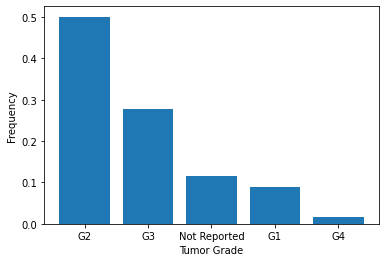

In [83]:
# tumor_ grade distribution plot
plt.bar(data_miRNA_5.tumor_grade.value_counts(normalize = True).index, data_miRNA_5.tumor_grade.value_counts(normalize = True).values)
plt.xticks(data_miRNA_5.tumor_grade.value_counts(normalize = True).index)
plt.xlabel('Tumor Grade')
plt.ylabel('Frequency')
plt.show()


In [84]:
#A cuarted data frame was saved as csv 
data_miRNA_5.to_csv('C:/Users/maria/Desktop/CPTAC-3/data_miRNA.csv')

### 4- Data pre-processing for modeling


In [85]:
# All 'Not Reported' events in tumor_grade column corresponded to  glioblastomas. Since tumor_grade would be the prediction
# target, glioblastomarows were dropped

data_miRNA_5.loc[data_miRNA_5.tumor_grade =='Not Reported', 'primary_diagnosis'].value_counts()

Glioblastoma    98
Name: primary_diagnosis, dtype: int64

In [86]:
data_miRNA_5 = data_miRNA_5[data_miRNA_5.primary_diagnosis !='Glioblastoma']
data_miRNA_5.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,gender,age_at_diagnosis,primary_diagnosis,tumor_grade,tumor_stage
2,13.768529,13.698553,13.715105,11.769493,10.766500,12.179938,10.345813,14.455957,14.589400,15.326121,...,0.0,8.267236,12.781438,10.912778,11.535000,female,27702.0,"Endometrioid adenocarcinoma, NOS",G3,I
3,14.756170,14.715036,14.715615,13.243572,11.120588,11.935819,10.090452,14.470656,14.542343,14.934333,...,0.0,6.245282,10.274397,11.881488,11.635385,male,24361.0,"Adenocarcinoma, NOS",G2,I
5,14.529227,14.467596,14.471634,12.774132,11.630387,11.505091,10.898986,14.278095,14.409765,14.426733,...,0.0,5.855438,10.635816,11.999221,11.544629,male,23121.0,"Infiltrating duct carcinoma, NOS",G3,II
6,14.696915,14.662610,14.660756,13.276807,11.257925,11.533866,10.534919,14.376763,14.462505,14.505764,...,0.0,6.259199,10.505806,11.428427,11.058805,male,26445.0,"Squamous cell carcinoma, NOS",G2,III
7,14.389828,14.369630,14.371670,12.592117,10.981248,11.860303,10.773036,14.548259,14.622548,14.647027,...,0.0,4.041618,10.590901,12.081467,12.133911,male,21263.0,"Renal cell carcinoma, NOS",G2,IV


In [87]:
# Identification of features and target variables
df = data_miRNA_5.drop(columns = ['tumor_grade'])
df.shape

(745, 1680)

In [88]:
df.columns

Index(['hsa-let-7a-1', 'hsa-let-7a-2', 'hsa-let-7a-3', 'hsa-let-7b',
       'hsa-let-7c', 'hsa-let-7d', 'hsa-let-7e', 'hsa-let-7f-1',
       'hsa-let-7f-2', 'hsa-let-7g',
       ...
       'hsa-mir-95', 'hsa-mir-9500', 'hsa-mir-96', 'hsa-mir-98', 'hsa-mir-99a',
       'hsa-mir-99b', 'gender', 'age_at_diagnosis', 'primary_diagnosis',
       'tumor_stage'],
      dtype='object', length=1680)

In [89]:
#Numeric columns of features
numeric_columns2 = [col for col in df.columns if df[col].dtypes == 'float']
df_2= df[numeric_columns2]
df_2.dtypes

hsa-let-7a-1        float64
hsa-let-7a-2        float64
hsa-let-7a-3        float64
hsa-let-7b          float64
hsa-let-7c          float64
                     ...   
hsa-mir-96          float64
hsa-mir-98          float64
hsa-mir-99a         float64
hsa-mir-99b         float64
age_at_diagnosis    float64
Length: 1677, dtype: object

In [90]:
df_2.shape

(745, 1677)

In [91]:
#Feature Selection #1,  VarianceThreshold 
from sklearn.feature_selection import VarianceThreshold

# Creation of an instance of VarianceThreshold class with threshold=0.5

fet_sel = VarianceThreshold(threshold=0.5)

# Fiteamos a fet_sel con nuestro df1:

fet_sel.fit_transform(df_2)


array([[1.17694930e+01, 1.07664997e+01, 1.03458133e+01, ...,
        1.09127782e+01, 1.15350004e+01, 2.77020000e+04],
       [1.32435718e+01, 1.11205875e+01, 1.00904525e+01, ...,
        1.18814884e+01, 1.16353849e+01, 2.43610000e+04],
       [1.27741324e+01, 1.16303869e+01, 1.08989861e+01, ...,
        1.19992215e+01, 1.15446293e+01, 2.31210000e+04],
       ...,
       [1.16671191e+01, 9.24503226e+00, 1.01845571e+01, ...,
        9.47213675e+00, 1.17733427e+01, 2.29340000e+04],
       [1.19425548e+01, 1.04242665e+01, 1.07315632e+01, ...,
        1.11472149e+01, 1.17107460e+01, 1.37310000e+04],
       [1.23568303e+01, 1.12449571e+01, 1.04043725e+01, ...,
        1.15424583e+01, 1.12288809e+01, 1.77600000e+04]])

In [92]:
#Columns shape decreased to 1194
df_2.columns[fet_sel.get_support()]

Index(['hsa-let-7b', 'hsa-let-7c', 'hsa-let-7e', 'hsa-mir-1-1', 'hsa-mir-1-2',
       'hsa-mir-100', 'hsa-mir-101-1', 'hsa-mir-101-2', 'hsa-mir-105-1',
       'hsa-mir-105-2',
       ...
       'hsa-mir-939', 'hsa-mir-940', 'hsa-mir-942', 'hsa-mir-943',
       'hsa-mir-944', 'hsa-mir-95', 'hsa-mir-96', 'hsa-mir-99a', 'hsa-mir-99b',
       'age_at_diagnosis'],
      dtype='object', length=1193)

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
# a data frame was created from the VarianceThreshold output

df_3 = pd.DataFrame(fet_sel.transform(df_2), columns = df_2.columns[fet_sel.get_support()])
#In order to avoid negative values, df_3 was normalized

df_3_normalized = (df_3 - df_3.min()) / ( df_3.max() - df_3.min())

In [95]:
df_3_normalized= df_3_normalized.reset_index()

In [96]:
#There were no nulls
df_3_normalized.isnull().sum()

index               0
hsa-let-7b          0
hsa-let-7c          0
hsa-let-7e          0
hsa-mir-1-1         0
                   ..
hsa-mir-95          0
hsa-mir-96          0
hsa-mir-99a         0
hsa-mir-99b         0
age_at_diagnosis    0
Length: 1194, dtype: int64

In [97]:
df_3_normalized.shape

(745, 1194)

In [98]:
# 'object' type columns
categorical_columns= [col for col in df.columns if df[col].dtypes == 'object']
categorical_columns

['gender', 'primary_diagnosis', 'tumor_stage']

In [99]:
df_4 = df[categorical_columns]
df_4= df_4.reset_index()
df_4.shape

(745, 4)

In [100]:
#A new data frame was created as a result of a concatenation from df_3_normalized and df_4
df_5 = pd.concat([df_3_normalized,df_4], axis = 1)
df_5 = df_5.drop(columns = 'index')
df_5.shape

(745, 1196)

In [101]:
# target column was codified with LabelEncoder
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data_miRNA_5['tumor_grade'] = enc.fit_transform(data_miRNA_5['tumor_grade'])

In [102]:
# target labels distribution
data_miRNA_5['tumor_grade'].value_counts()

1    422
2    233
0     76
3     14
Name: tumor_grade, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.naive_bayes import GaussianNB

# resultant features and target
X= df_5
y=data_miRNA_5['tumor_grade']

# Train test split: 
X_train, X_test, y_train, y_test=train_test_split(X,y, stratify=y, random_state = 12)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(558, 1196)

(187, 1196)

(558,)

(187,)

In [104]:
#SMOTENC application for imbalanced classes
from imblearn.over_sampling import SMOTENC
sm= SMOTENC(categorical_features=(X_train.dtypes=='object').values, k_neighbors=3, random_state=0)
X_train_sm, y_train_sm= sm.fit_resample(X_train, y_train)
display(X_train_sm.shape, y_train_sm.shape)

(1264, 1196)

(1264,)

In [105]:
# In order to transform train and test sets with  OneHOtencoding a new data column 'training' was created in both data set.
# This column value was assignated as 1 in train set and as 0 in test set.

X_train_sm['training'] = 1
X_test['training'] = 0

# A new data frame 'X_all' was created in order to join both data sets
X_all = pd.concat([X_train_sm, X_test])

C:\Users\maria\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [106]:
X_all.training.astype(float)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
530    0.0
405    0.0
738    0.0
166    0.0
294    0.0
Name: training, Length: 1451, dtype: float64

In [107]:
X_all.head()

,hsa-let-7b,hsa-let-7c,hsa-let-7e,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-105-1,hsa-mir-105-2,...,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-99a,hsa-mir-99b,age_at_diagnosis,gender,primary_diagnosis,tumor_stage,training
0,0.436938,0.691261,0.565677,0.669085,0.637280,0.590152,0.240622,0.238527,0.637309,0.623438,...,0.823994,0.594546,0.510229,0.754109,0.466123,0.672176,male,"Squamous cell carcinoma, NOS",IV,1
1,0.369579,0.592810,0.544129,0.553192,0.511240,0.745147,0.530027,0.529701,0.353796,0.170219,...,0.305499,0.432409,0.309208,0.790394,0.669058,0.442539,male,"Renal cell carcinoma, NOS",I,1
2,0.105584,0.137104,0.459441,0.131921,0.031891,0.077002,0.339595,0.331745,0.843017,0.825434,...,0.940465,0.439917,0.796194,0.425690,0.602104,0.766251,male,"Squamous cell carcinoma, NOS",III,1
3,0.512069,0.673716,0.682113,0.361605,0.305123,0.567631,0.347084,0.350853,0.353796,0.330954,...,0.305499,0.377261,0.570454,0.687309,0.569124,0.510793,male,"Renal cell carcinoma, NOS",I,1
4,0.641957,0.721165,0.780183,0.470130,0.419460,0.778579,0.341256,0.345647,0.130598,0.101835,...,0.360610,0.368157,0.507597,0.648726,0.516866,0.588463,male,"Adenocarcinoma, NOS",I,1


In [108]:
from sklearn.preprocessing import OneHotEncoder

In [109]:
# OneHotEncoder (OHE) was used to encode categorical features as a one-hot numeric array.
encoder = OneHotEncoder(drop = 'first', sparse = False)
encoder.fit_transform(X_all[categorical_columns])


array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [110]:
#A data frame was created  with the numeric array resultant from OHE
df_6= pd.DataFrame(encoder.fit_transform(X_all[categorical_columns]), columns = encoder.get_feature_names())


In [112]:
#Numeric and categorical features were joined again
numeric_columns3 = [col for col in X_all.columns if X_all[col].dtypes == 'float' ]
df_7 = pd.concat([X_all[numeric_columns3].reset_index(), df_6.reset_index(), X_all['training'].reset_index()], axis =1)

In [113]:
df_7= df_7.drop(columns = 'index')
df_7.head()

,hsa-let-7b,hsa-let-7c,hsa-let-7e,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-105-1,hsa-mir-105-2,...,x0_male,"x1_Endometrioid adenocarcinoma, NOS","x1_Infiltrating duct carcinoma, NOS","x1_Renal cell carcinoma, NOS","x1_Squamous cell carcinoma, NOS",x2_II,x2_III,x2_IV,x2_NOT REPORTED,training
0,0.436938,0.691261,0.565677,0.669085,0.637280,0.590152,0.240622,0.238527,0.637309,0.623438,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,0.369579,0.592810,0.544129,0.553192,0.511240,0.745147,0.530027,0.529701,0.353796,0.170219,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.105584,0.137104,0.459441,0.131921,0.031891,0.077002,0.339595,0.331745,0.843017,0.825434,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,0.512069,0.673716,0.682113,0.361605,0.305123,0.567631,0.347084,0.350853,0.353796,0.330954,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.641957,0.721165,0.780183,0.470130,0.419460,0.778579,0.341256,0.345647,0.130598,0.101835,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [114]:
#Train test setswere split according to 'training' column value
X_train_sm = df_7.loc[df_7.training==1, :]
X_test = df_7.loc[df_7.training==0, :]
display(X_train_sm.shape, X_test.shape)

(1264, 1203)

(187, 1203)

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [116]:
#Features standarization
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train_sm)
X_test_sc = scaler.fit_transform(X_test)

In [117]:
#Feature Selection # 2 = SelectPercentile
from sklearn.feature_selection import SelectPercentile
fs_m = SelectPercentile(score_func=chi2, percentile=23.5)
fs_m.fit(X_train_sc, y_train_sm)
X_train_reduced = fs_m.transform(X_train_sc)
X_test_reduced = fs_m.transform(X_test_sc)

In [118]:
#Data frame with results
feat_scores_m = pd.DataFrame()
feat_scores_m["F Score"] = fs_m.scores_
feat_scores_m["P Value"] = fs_m.pvalues_
feat_scores_m["Attribute"] = X_train_sm.columns
feat_scores_m["Support"] = fs_m.get_support()
feat_scores_m.sort_values(["F Score"], ascending=False)

,F Score,P Value,Attribute,Support
1200,471.549451,6.981675e-102,x2_IV,True
1196,376.312860,2.989268e-81,"x1_Renal cell carcinoma, NOS",True
1194,255.321101,4.622766e-55,"x1_Endometrioid adenocarcinoma, NOS",True
1198,131.780269,2.235642e-28,x2_II,True
1197,105.298851,1.126845e-22,"x1_Squamous cell carcinoma, NOS",True
...,...,...,...,...
939,0.030064,9.986260e-01,hsa-mir-664b,False
36,0.027415,9.988026e-01,hsa-mir-1244-1,False
154,0.026906,9.988356e-01,hsa-mir-1911,False
670,0.004963,9.999071e-01,hsa-mir-4783,False


In [119]:
# Data frame with resultant features from feature selection (train set)
X_train_reduced_data = pd.DataFrame(X_train_sm.loc[:,fs_m.get_support()], columns= (X_train_sm.loc[:,fs_m.get_support()]).columns)

In [120]:
#data frame was reduced to 283 features
X_train_reduced_data.shape

(1264, 283)

In [121]:
# Data frame with resultant features from feature selection (test set)
X_test_reduced_data = pd.DataFrame(X_test.loc[:,fs_m.get_support()], columns= (X_test.loc[:,fs_m.get_support()]).columns)
X_test_reduced_data.shape

(187, 283)

### 6-  Model Building and Tunning

### Model 1. NAIVE_BAYES

In [122]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train_reduced, y_train_sm)


GaussianNB()

In [123]:
#prediction calculations for train and test sets
y_predict_test = NB.predict(X_test_reduced)
y_predict_train= NB.predict(X_train_reduced)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


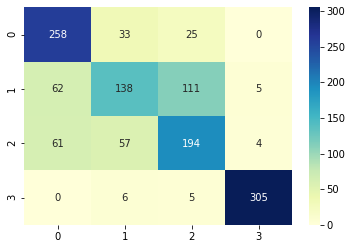

In [125]:
#visualization of confussion matrix for train set
conf_matrix = confusion_matrix(y_train_sm, y_predict_train)
conf_mat_df = pd.DataFrame(data=conf_matrix)

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');


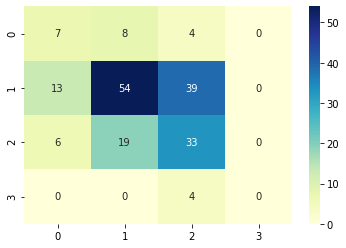

In [126]:
#visualization of confussion matrix for test set
conf_matrix = confusion_matrix(y_test, y_predict_test)
conf_mat_df = pd.DataFrame(data=conf_matrix)

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');


In [127]:
#Accuracy for test set
accuracy_score(y_predict_test, y_test)

0.5026737967914439

In [128]:
from sklearn.metrics import classification_report
#Classification report for train set
print(classification_report(y_train_sm, y_predict_train))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       316
           1       0.59      0.44      0.50       316
           2       0.58      0.61      0.60       316
           3       0.97      0.97      0.97       316

    accuracy                           0.71      1264
   macro avg       0.70      0.71      0.70      1264
weighted avg       0.70      0.71      0.70      1264



In [129]:
#Classification report for test set
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.27      0.37      0.31        19
           1       0.67      0.51      0.58       106
           2       0.41      0.57      0.48        58
           3       0.00      0.00      0.00         4

    accuracy                           0.50       187
   macro avg       0.34      0.36      0.34       187
weighted avg       0.53      0.50      0.51       187



C:\Users\maria\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 2. LOGISTIC REGRESSION

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [131]:
# Cross validation for logistic regression to find the best hyper parameters
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
params_m = [
    {'C': [0.1, 1, 10],
     'penalty': ['l1','l2']}]

In [132]:
# Cross validation was made by grid search
gs = GridSearchCV(estimator= LogisticRegression(multi_class= 'multinomial', max_iter = 5000, solver = 'lbfgs'),\
                  param_grid=params_m, scoring='accuracy', cv=skf, n_jobs=4)

fit = gs.fit(X_train_reduced, y_train_sm)
 

In [133]:
# Grid search best score
gs.best_score_

0.8038019951063429

In [134]:
# Grid search best parameters
gs.best_params_

{'C': 10, 'penalty': 'l2'}

In [135]:
#prediction calculations for train and test sets
y_predict_log_train = gs.predict(X_train_reduced)
y_predict_log_test = gs.predict(X_test_reduced)


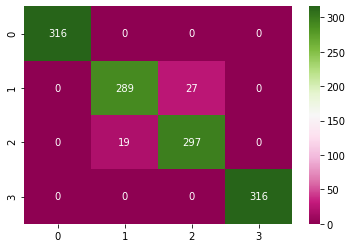

In [136]:
#visualization of confussion matrix for train set
conf_matrix = conf_matrix = confusion_matrix(y_train_sm, y_predict_log_train)
conf_mat_df = pd.DataFrame(data=conf_matrix)

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='PiYG');

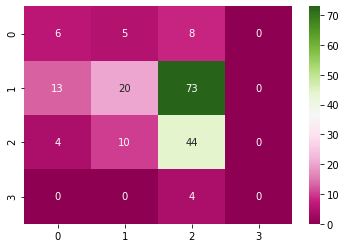

In [137]:
#visualization of confussion matrix for test set
conf_matrix = conf_matrix = confusion_matrix(y_test, y_predict_log_test)
conf_mat_df = pd.DataFrame(data=conf_matrix)

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='PiYG');

In [138]:
#Classification report for train set
print(classification_report(y_train_sm, y_predict_log_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       0.94      0.91      0.93       316
           2       0.92      0.94      0.93       316
           3       1.00      1.00      1.00       316

    accuracy                           0.96      1264
   macro avg       0.96      0.96      0.96      1264
weighted avg       0.96      0.96      0.96      1264



In [139]:
#Classification report for test set
print(classification_report(y_test, y_predict_log_test))

              precision    recall  f1-score   support

           0       0.26      0.32      0.29        19
           1       0.57      0.19      0.28       106
           2       0.34      0.76      0.47        58
           3       0.00      0.00      0.00         4

    accuracy                           0.37       187
   macro avg       0.29      0.32      0.26       187
weighted avg       0.46      0.37      0.34       187



C:\Users\maria\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
#Feature selection #3 gridsearch para RFE

from sklearn.feature_selection import RFECV

model = gs.best_estimator_

selector = RFECV(model, scoring='accuracy',step = 1, cv=skf, verbose=0,n_jobs=3)
selector.fit(X_train_reduced, y_train_sm)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
      estimator=LogisticRegression(C=10, max_iter=5000,
                                   multi_class='multinomial'),
      n_jobs=3, scoring='accuracy')

In [ ]:
# 124 features were selected
selector.n_features_

124

In [ ]:
# Data frame with resultant features
X_train_reduced_2= X_train_reduced_data.loc[:, selector.support_]
X_test_reduced_2 = X_test_reduced_data.loc[:, selector.support_]

In [ ]:
#feature_names
X_train_reduced_2.columns

### Model 3. LOGISTIC  REGRESSION AFTER RFE

In [ ]:
model_reduced = gs.fit(X_train_reduced_2, y_train_sm)

In [ ]:
#prediction calculations for train and test sets

y_predict_log_train_reduced = model_reduced.predict(X_train_reduced_2)
y_predict_log_test_reduced = model_reduced.predict(X_test_reduced_2)

In [ ]:
#visualization of confussion matrix for train set

conf_matrix = conf_matrix = confusion_matrix(y_train_sm, y_predict_log_train_reduced)
conf_mat_df = pd.DataFrame(data=conf_matrix)                           
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='PiYG');

In [ ]:
#visualization of confussion matrix for test set

conf_matrix = conf_matrix = confusion_matrix(y_test, y_predict_log_test_reduced)
conf_mat_df = pd.DataFrame(data=conf_matrix)                      

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='PiYG');

In [ ]:
#Classification report for train set

print(classification_report(y_train_sm, y_predict_log_train_reduced))

In [ ]:
#Classification report for test set

print(classification_report(y_test, y_predict_log_test_reduced))

In [ ]:
names_of_variables =np.array(X_train_reduced_2.columns)
names_of_variables

### Model 4. Regression trees based models

In [ ]:
# Model performance was evaluated with the function 'evaluar_rendimiento' which return model accuracy after cross validation from
# different ensemble models

from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=4, random_state=41, shuffle=True)

In [ ]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

evaluar_rendimiento(dt,"Árbol de decisión", X_train_reduced, y_train_sm, cv)

In [ ]:
evaluar_rendimiento(dt,"Árbol de decisión TEST", X_test_reduced, y_test, cv)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=1)
evaluar_rendimiento(ab, "AdaBoostClassifier", X_train_reduced, y_train_sm, cv)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ab = AdaBoostClassifier(base_estimator=dt, n_estimators=500,random_state=1)
evaluar_rendimiento(ab, "AdaBoostClassifier", X_test_reduced, y_test, cv)

In [ ]:
gb = GradientBoostingClassifier()
evaluar_rendimiento(gb, "GradientBoostingClassifier",X_train_reduced, y_train_sm, cv)

In [ ]:
evaluar_rendimiento(gb, "GradientBoostingClassifier TEST", X_test_reduced, y_test, cv)

## In conclusion, the best model was the  "GradientBoostingClassifier" with accuracy of 0.513 ± 0.074